# Jupyter Data Science Workflow
## From wxploratoray analysis to reproducible science
A.N. Notes

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x1dea6d32fd0>)

In [3]:
#!more Fremont.csv

In [4]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [5]:
# make sure the plots are in jupyter notebook rather than a separate file
%matplotlib inline

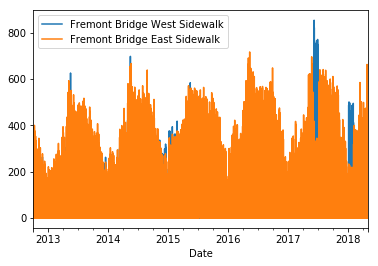

In [6]:
# pands way of plotting
data.plot()

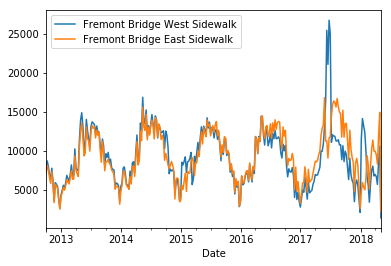

In [7]:
# to plot total number of rides over each week
data.resample('W').sum().plot()

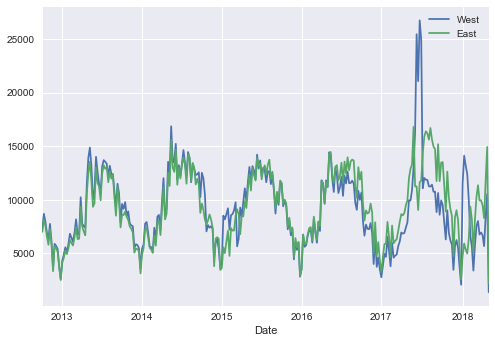

In [8]:
# chagne the style of the plot to seaborn
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# chagne the legend names
data.columns = ["West", "East"]
# plot with the new style and column names
data.resample('W').sum().plot()

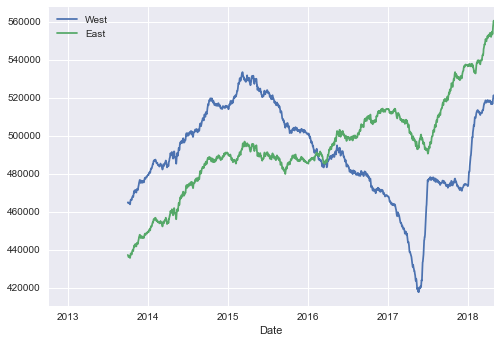

In [9]:
# let's identify the annual trend
# rolling sum over 365 days
data.resample('D').sum().rolling(365).sum().plot()

(0, 567738.75)

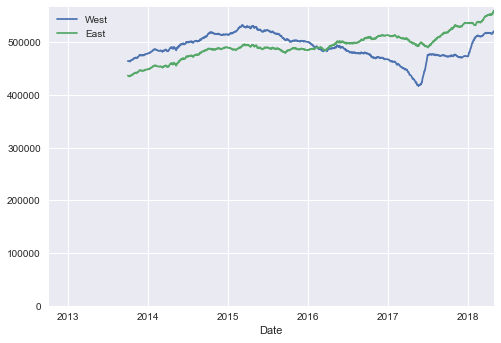

In [10]:
# set the ylim to proper numbers
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None) # None to use the current max in y

(0, 1114778.25)

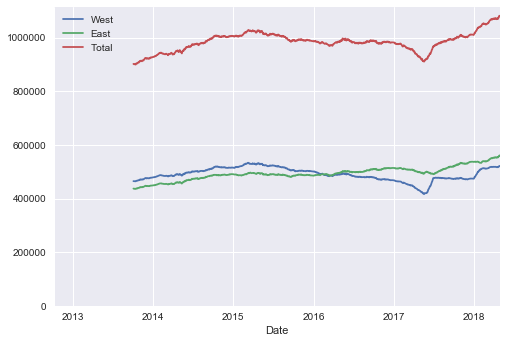

In [11]:
# there seems to be an offset between 'East' and 'West' data
# let's create a column called 'Total'
data['Total'] = data['West'] + data['East']
# now plot it again:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None) # None to use the current max in y

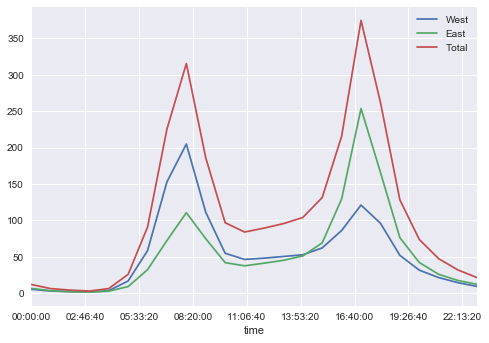

In [12]:
# let's look into trends within each day
data.groupby(data.index.time).mean().plot()

In [13]:
# let's see the whole dataset in this way (no averages)
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


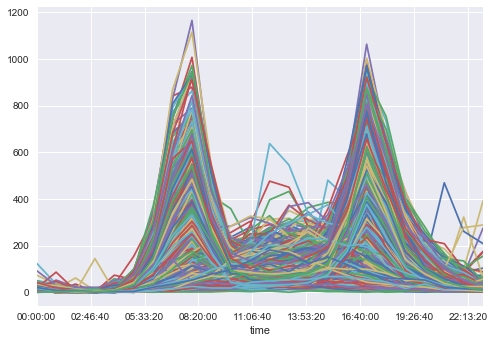

In [14]:
# plot these without legends
pivoted.plot(legend=False)

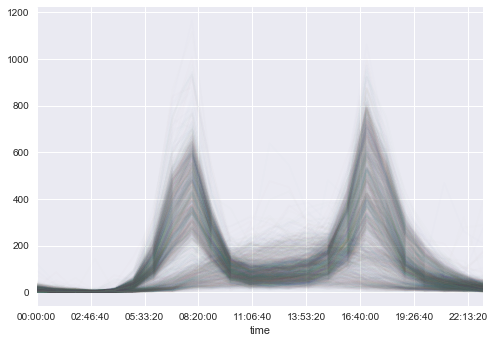

In [15]:
# it is generally hard to see so let's change the transparancy
pivoted.plot(legend=False, alpha=0.01)

### now save it
### to make sure everything works just: Kernel: "Restart & Run All"

## use github
1. sign in to github
2. make a repository in github as "JupyterWorkflow"
3. on your machine file up git
4. git clone "address from clone or download"
5. mv jupyterWorkflow.ipynb JupyterWorkflow/
6. git add jupyterWorkflow.ipynb
7. git commit -m "Add initial analysis notebook"
8. git push origin master
now 

now you have a local repository that you can monitor your code within the notebook and an online version that can be cloned or push the changes into cloud!